In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [5]:
#Published Airline IATA Code nulls cleaned
notnull = pd.notnull(df["Published Airline IATA Code"])
df=df[notnull]

In [6]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [7]:
df["Activity Month"]=df["Activity Period"].astype(str).str[4:]
df["Activity Year"]=df["Activity Period"].astype(str).str[:4]
df["Activity Month"]=df["Activity Month"].astype(int)
df["Activity Year"]=df["Activity Year"].astype(int)
del df["Activity Period"]

In [8]:
df

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Activity Month,Activity Year
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,7,2005
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,7,2005
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,7,2005
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,7,2005
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,7,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,6,2018
18881,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,6,2018
18882,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,6,2018
18883,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,6,2018


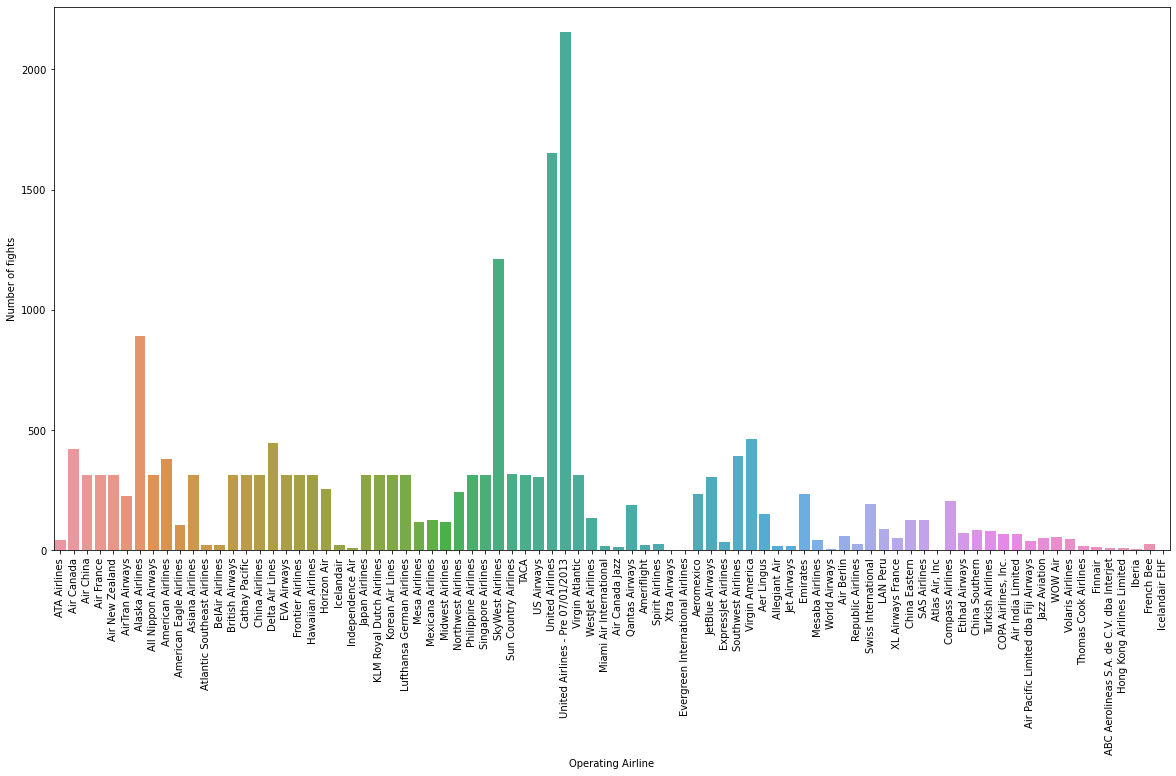

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(df["Operating Airline"]);
plt.xticks(rotation=90);
plt.ylabel("Number of fights");

In [10]:
airline_count = df["Operating Airline"].value_counts() # How many times ? 

In [11]:
airline_count

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
World Airways                          3
Atlas Air, Inc                         2
Evergreen International Airlines       2
Xtra Airways                           2
Icelandair EHF                         2
Name: Operating Airline, Length: 84, dtype: int64

In [12]:
airline_passenger_count=df.groupby(df["Operating Airline"]).sum()["Passenger Count"].sort_values(ascending=False)

In [13]:
list = pd.DataFrame(airline_passenger_count)

In [14]:
list

,Passenger Count
Operating Airline,
United Airlines,112640408
United Airlines - Pre 07/01/2013,105363917
SkyWest Airlines,44582356
American Airlines,43622387
Virgin America,37843920
...,...
World Airways,785
Xtra Airways,146
Ameriflight,110


In [15]:
x1 = df[["Passenger Count","Operating Airline"]]

In [16]:
x1

,Passenger Count,Operating Airline
0,27271,ATA Airlines
1,29131,ATA Airlines
2,5415,ATA Airlines
3,35156,Air Canada
4,34090,Air Canada
...,...,...
18880,50,WOW Air
18881,10868,WestJet Airlines
18882,11664,WestJet Airlines
18883,804,XL Airways France


In [17]:
x2 = df[["Operating Airline","Activity Year"]]

In [18]:
x2

,Operating Airline,Activity Year
0,ATA Airlines,2005
1,ATA Airlines,2005
2,ATA Airlines,2005
3,Air Canada,2005
4,Air Canada,2005
...,...,...
18880,WOW Air,2018
18881,WestJet Airlines,2018
18882,WestJet Airlines,2018
18883,XL Airways France,2018


In [19]:
x1=pd.get_dummies(x1,drop_first=True)

In [20]:
x2=pd.get_dummies(x2,drop_first=True)

In [21]:
x1

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,27271,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29131,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5415,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35156,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34090,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18881,10868,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18882,11664,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18883,804,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
x2

,Activity Year,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,2005,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2005,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2005,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2005,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2005,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18881,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18882,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18883,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### For X1

In [24]:
model = KMeans(n_clusters = 5)
model = model.fit(x1)
tahmin1 = model.predict(x1)
tahmin1

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
x1["cluster"] = tahmin1

In [26]:
silhouette_score(x1,tahmin1) 

0.7844848834699494

In [27]:
clust=x1.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


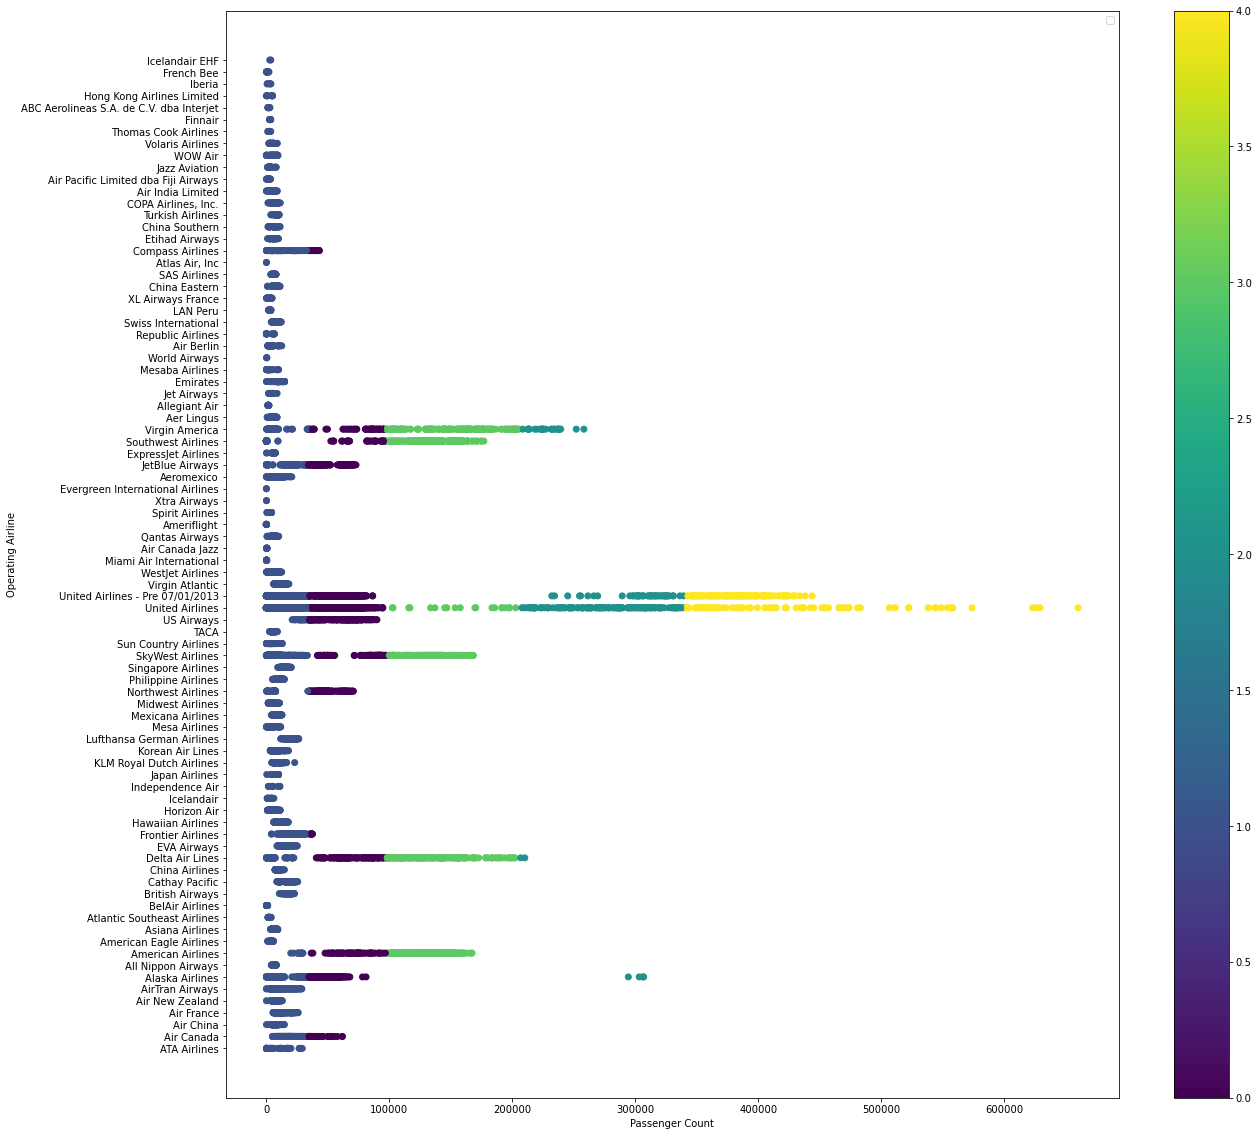

In [28]:
plt.figure(figsize=(20,20))
plt.scatter(df["Passenger Count"],df["Operating Airline"],c=tahmin1)
plt.ylabel("Operating Airline")
plt.xlabel("Passenger Count")
plt.legend()
plt.colorbar()
plt.show()

In [29]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):                      # 1,clusters --- Creates number from 1 to cluster number. no_of_cluster+=1    
        no_of_cluster+=1                                             # add 1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x1)
        pred=model.fit_predict(x1)
        sum_of_squared_distances.append(model.inertia_)              # Calculates differences.
        score = silhouette_score(x1,pred)                             # Calculates Silhouette score .
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.8593933380284732
Number of cluster 3,silhouette0.8283826884763342
Number of cluster 4,silhouette0.7861114818996289
Number of cluster 5,silhouette0.7845572109524687
Number of cluster 6,silhouette0.6616386101707574
Number of cluster 7,silhouette0.6621618765080302
Number of cluster 8,silhouette0.6438737369416926
Number of cluster 9,silhouette0.6410726837688845


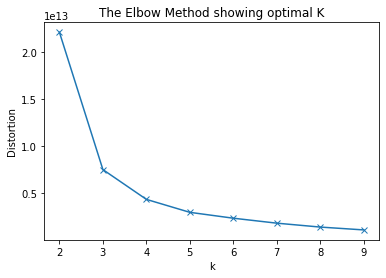

In [30]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()     

### For X2

In [31]:
model = KMeans(n_clusters = 5)
model = model.fit(x2)
tahmin2 = model.predict(x2)
tahmin2

array([2, 2, 2, ..., 0, 0, 0])

In [32]:
x2["cluster"] = tahmin2

In [33]:
silhouette_score(x2,tahmin2) 

0.48438337035050805

In [34]:
clust=x2.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


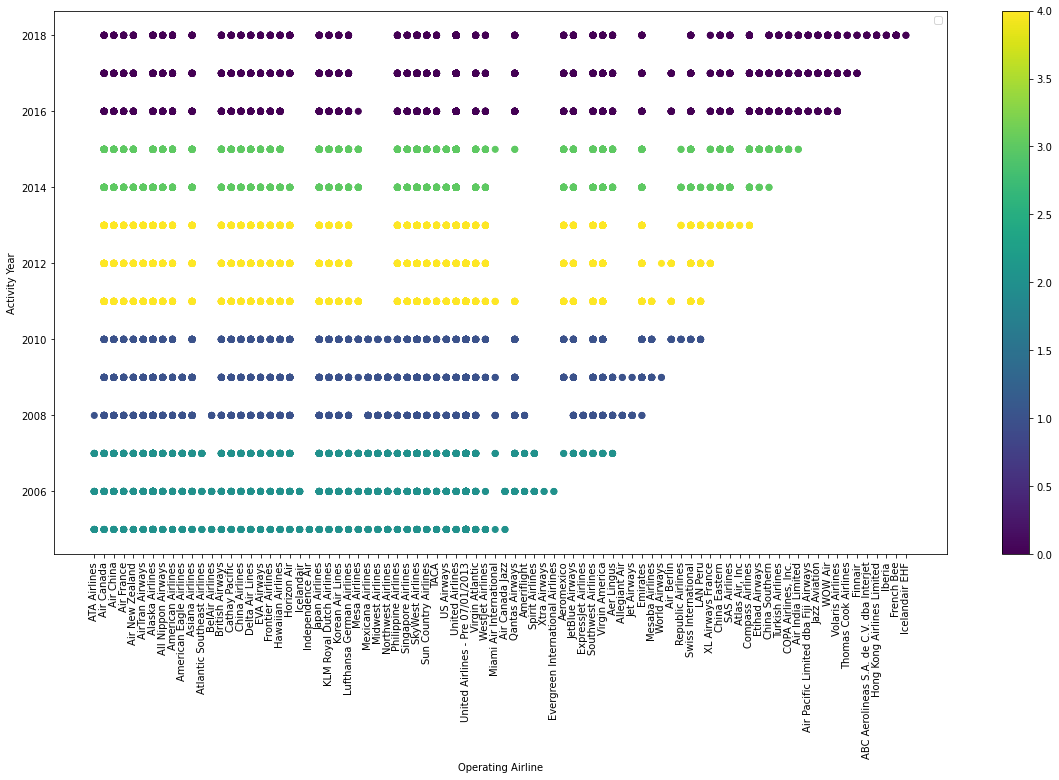

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(df["Operating Airline"],df["Activity Year"],c=tahmin2)
plt.ylabel("Activity Year")
plt.xlabel("Operating Airline")
plt.xticks(rotation=90);
plt.legend()
plt.colorbar()
plt.show()

In [36]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):                      # 1,clusters --- Creates number from 1 to cluster number. no_of_cluster+=1    
        no_of_cluster+=1                                             # add 1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x1)
        pred=model.fit_predict(x1)
        sum_of_squared_distances.append(model.inertia_)              # Calculates differences.
        score = silhouette_score(x1,pred)                             # Calculates Silhouette score .
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.5192984857665991
Number of cluster 3,silhouette0.5674753809580494
Number of cluster 4,silhouette0.5093106378639549
Number of cluster 5,silhouette0.48438337035050805
Number of cluster 6,silhouette0.4191649500945941
Number of cluster 7,silhouette0.37811513496438737
Number of cluster 8,silhouette0.2917073805766132
Number of cluster 9,silhouette0.27369254360303535


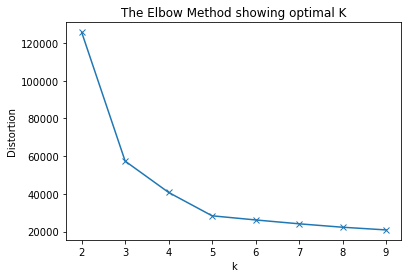

In [37]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 